# Tratamiento de imágenes - Trabajos prácticos
# Práctico 0 - Uso de OpenCV

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imsave 
import cv2 #opencv

# FORMAS DE VER LAS GRAFICAS --------------------
# ELEGIR UNA DE LAS OPCIONES Y DES-COMENTAR (sacar # de la linea)
# ----------------
# a) graficas en línea  entre las celdas (no interactivo)
# %matplotlib inline
# ---------------- 
# b) graficas en línea  entre las celdas (interactivo)
%matplotlib notebook
# ----------------
# c) graficas en ventanas externas (abre una ventana por cada figura)
#%matplotlib
# ----------------
# d) Si se usa "jupyter lab" en lugar de "jupyter notebook" usar %matplotlib widget en lugar de %matplotlib notebook 
# requiere instalar el modulo "ipympl". Ver https://stackoverflow.com/questions/51922480/javascript-error-ipython-is-not-defined-in-jupyterlab#56416229
# %matplotlib widget
#---------------------------------------------------

plt.rcParams['figure.figsize'] = (6.0, 4.0) # set default size of plots
plt.rcParams['image.cmap'] = 'gray'

La imagen I tiene tamaño:(266, 400, 3)


(-0.5, 399.5, 265.5, -0.5)

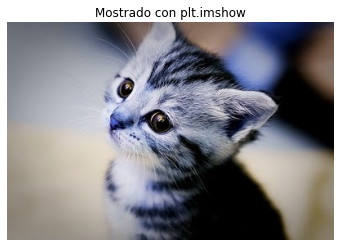

In [2]:
%matplotlib inline
# abrir una imagen y mostrarla
filenames = ['./imagenes/kitten.jpg','./imagenes/sky.jpg','./imagenes/RGB.png']

# read image
I = cv2.imread(filenames[0])
print("La imagen I tiene tamaño:" + str(I.shape))

# mostrar mediante pyplot
plt.imshow(I)
#plt.gcf().set_size_inches(3, 3) 
plt.title('Mostrado con plt.imshow')
plt.axis('off')



In [3]:
# mostrar mediante OpenCV
# no se puede hacer "inline", hay que hacerlo con ventanas externas
# %matplotlib

cv2.namedWindow('Mostrado con cv2.imshow',flags=cv2.WINDOW_GUI_EXPANDED)
cv2.imshow('Mostrado con cv2.imshow', I)

# En caso de tener problemas, descomentar las siguientes lineas
cv2.waitKey(0) # espera hasta que se presiona alguna tecla
cv2.destroyAllWindows() # cierra todas las ventanas de cv2.imshow

In [4]:
# volver a depliegue "inline"
%matplotlib inline

### Preguntas:
a) Por qué se ve distinto la imagen al deplegarla con el imshow de pyplot y con el imshow de OpenCV ?  
b) Cómo ordena los canales OpenCV al cargar la imagen con cv2.imread()? Cómo RGB o BGR?  

Respuestas:



### Ejercicio
Realizar lo necesario para que los canales en la imagen I queden en orden RGB  
a) mediante manejo de índices de numpy  
b) mediante la función de OpenCV cv2.cvtColor()

### Ejercicio
**Uso de funciones de OpenCV**   

a) Cargar en I la imagen del gato  
b) Generar una imagen gris J a partir de I con cv2.cvtColor(...)  
c) A partir de la imagen J generar una imagen K blanco y negro usando umbralización (thresholding en ingles)   (Buscar tutorial de thresholding en OpenCV)


### Ejercicio

**Umbralización en Fiji**

1. Cargar imagen del gato 
2. Pasar a imagen gris (_Image-->Type-->8 bits_) 
3.  Umbralizar imagen (_Ctrl+Shift+T_ o _Image-->Adjust-->Threshold_)
4. Visualizar con _B&W_ y probar con varios valores de umbrales superiores/inferiores


### Ejercicio:
A partir de las imágenes kitten y sky, generar una imagen que sea una mezcla de las anteriores.  
K=alfa*I+(1-alfa)*J  
Desplegar las imágenes originales y las mezclas para distinto alfa.  

Notar que las imágenes son de distinto tamaño y se deberá como primer paso llevarlas a un mismo tamaño.  

Realizar en:
- Notebook, con funciones específicas de opencv que genere el blend o mezcla.


- Fiji, con el **macro** _cat_sky_blend.ijm_:
 1. Levantar macro en Fiji (arrastrar archivo o seleccionarlo en _Plugins-->Macros-->Run_). 
 2. Comentar cada paso del macro y hallar el valor de alfa 
 3. Recrear el macro grabando el procedimiento paso por paso (_Plugins-->Macros-->Record_). 
 
 _Hint:_ Seleccionar la imagen del gato (_Select All_ o _Crtl+A_) y replicar selección en la imagen del cielo (_Restore Selection_ o _Ctrl+Shift+E_) para luego recortar (_Crop_) la última.



## Parte 3  (Opcional) - Video 
Esta parte puede o no funcionar dependiendo de cómo se haya instalado OpenCV. En la instalación sugerida debería funcionar

### Experimentar: Procesar cuadros del video de la cámara web  (o de un archivo de video)
En la siguiente celda se capturan cuadros de la cámara web o de un archivo de video. Es posible realizar un procesamiento sobre cada cuadro del video. Se puede probar por ejemplo espejar, modificar colores, etc.

In [5]:
# Adaptado de:
# (https://github.com/bikz05/ipython-notebooks/blob/master/computer-vision/displaying-video-in-ipython-notebook.ipynb)

%matplotlib

# Abrir la ventana para desplegar los cuadros del video
cv2.namedWindow('Video', flags=cv2.WINDOW_GUI_EXPANDED)

# Grab the input device, in this case the webcam
# You can also give path to the video file

# VideoCapture recibe un entero (0 para la primera camara web, 1 para la segunda si hay otra, etc) 
# o se le puede pasar un string con el camino a un archivo de video
vid = cv2.VideoCapture(0)  

# Put the code in try-except statements
# Catch the keyboard exception and 
# release the camera device and 
# continue with the rest of code.
try:
    while(True):
        # Capture frame-by-frame
        ret, frame = vid.read()
        if not ret:
            # Release the Video Device if ret is false
            vid.release()
            # Message to be displayed after releasing the device
            print("Released Video Resource")
            break
        
        #-----------------------------------------------------------
        # ACA SE PODRIA PROCESAR EL CUADRO
        # Pueden probar alguna de las cosas que vimos (por ej. espejar, cambiar colores, etc.)
        
        
        
        #-----------------------------------------------------------
        
        # Mostrar el cuadro en la ventana
        cv2.imshow('Video', frame)
        #Si se presiona 'q' o 'Q' se termina el video
        if cv2.waitKey(5) in [ord('q'), ord('Q')]:
            raise KeyboardInterrupt()

except KeyboardInterrupt:
    # Release the Video Device
    vid.release()
    # Message to be displayed after releasing the device
    print("Released Video Resource")
    
    # cerrar la ventana de video
    cv2.destroyWindow('Video')

Using matplotlib backend: nbAgg
Released Video Resource
